In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
orginal_df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [3]:
df=orginal_df.copy()

In [4]:
import matplotlib.pyplot as plt,seaborn as sns, plotly.express as px,warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)


In [5]:
def pre_analysis(df):

    out=pd.DataFrame(columns=['Feature','Data_type','Missing_values_%','Duplicates_%','Unique_values_count'])
    for i in df.columns:
        
        #dtype of column
        dtype= df[i].dtype

        #missing values 
        miss_values=df[i].isna().sum() * 100

        #duplicated values
        duplicated_values=df.duplicated().sum() / len(df) *100

        #unique_values_count
        unique_values=df[i].nunique()

        out=pd.concat([out, pd.DataFrame({'Feature':i,'Data_type':dtype ,
                                          'Missing_values_%':miss_values,
                                          'Duplicates_%':duplicated_values,
                                          'Unique_values_count':unique_values,
                                            },index=[0]) ])
    
    return out.reset_index(drop=True)


In [6]:
pre_analysis(df)

,Feature,Data_type,Missing_values_%,Duplicates_%,Unique_values_count
0,Time,float64,0,0.379555,124592
1,V1,float64,0,0.379555,275663
2,V2,float64,0,0.379555,275663
3,V3,float64,0,0.379555,275663
4,V4,float64,0,0.379555,275663
5,V5,float64,0,0.379555,275663
6,V6,float64,0,0.379555,275663
7,V7,float64,0,0.379555,275663
8,V8,float64,0,0.379555,275663
9,V9,float64,0,0.379555,275663


In [7]:
#Since all of variables are preprocessed very well and all features are already undergone PCA , This dataset doesnt requires much preprocessing steps 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.175161e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.369007e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.094852e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.021879e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.500885e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.620335e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.149614e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.426963e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# Visualisation and Analysing Distirbution of our features

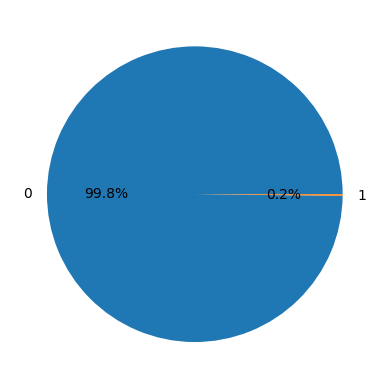

In [10]:
#Lets analyse target variable
plt.pie(df['Class'].value_counts(normalize=True).values,
        labels=df['Class'].value_counts(normalize=True).index,
        autopct='%.1f%%',
   )[-1];

#Distribution of sampels are so imbalanced

In [11]:
#Since most of values are unqiue and it not adds much information to our target
df.drop(columns=['Time'],inplace=True)

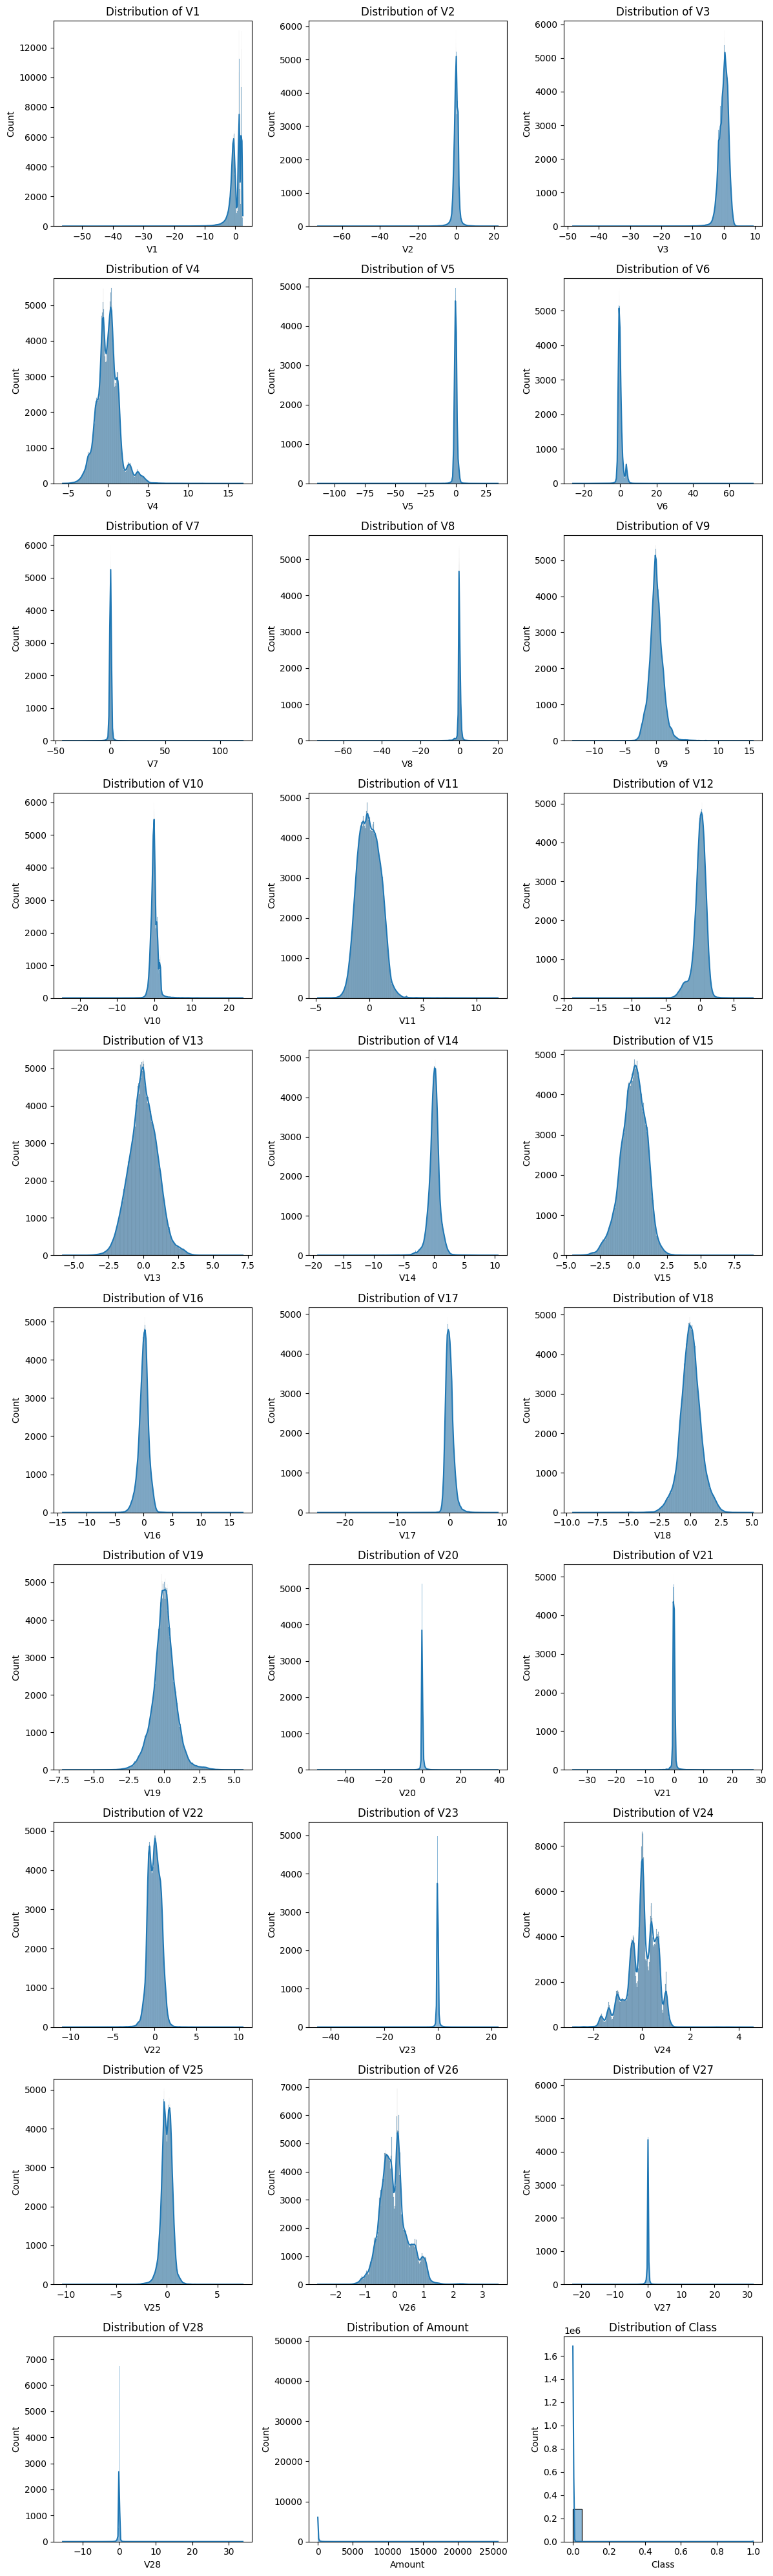

In [12]:
fig,axs=plt.subplots(nrows=10,ncols=3,figsize=(12,40))
for index,col in enumerate(df.columns):
    sns.histplot(data=df,x=col,kde=True,ax=axs[index//3,index%3]).set_title(f'Distribution of {col}')
plt.tight_layout()

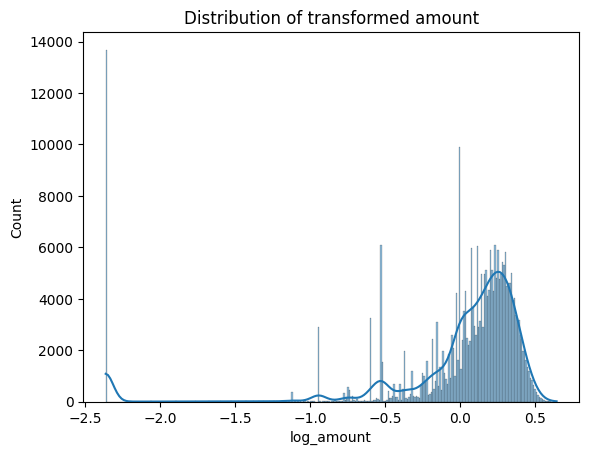

In [13]:
#except amount column we can identify that all other columns are normally distributed with outliers

df['log_amount']=np.log10(df.Amount+0.01)
#lets transform our amount feature
sns.histplot(np.log10(df['log_amount']),kde=True).set_title('Distribution of transformed amount');

In [14]:
df.drop(columns=['Amount'],inplace=True)

In [15]:
#lets undersample our clean data data
fraud=df[df['Class']==1]
clean=df[df['Class']==0]

clean_resampled=clean.sample(int(len(fraud)*20),random_state=2)

df_undersampled=pd.concat([clean_resampled,fraud],axis=0)
df_undersampled.reset_index(drop=True,inplace=True)


#seperate our features and labels
features,labels=df_undersampled.drop('Class',axis=1).values,df_undersampled.Class.values

In [16]:
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

In [17]:
tsne=TSNE(n_components=2,random_state=3).fit_transform(features)

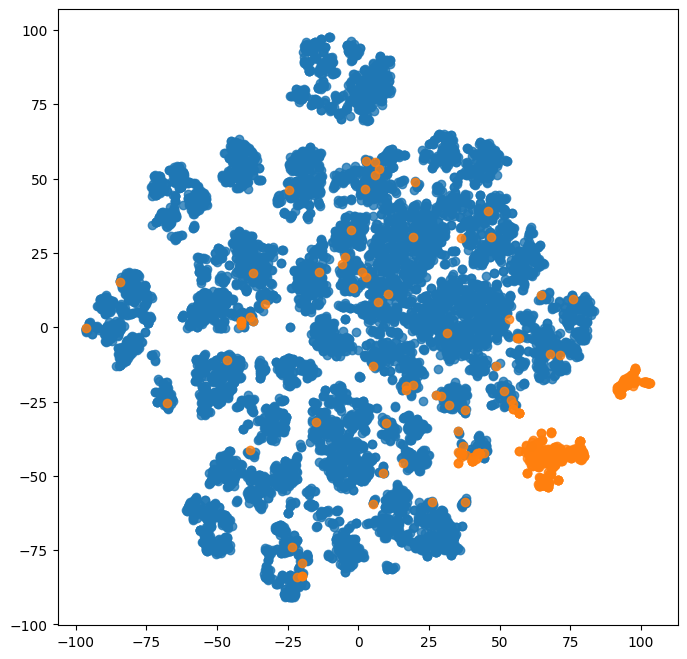

In [18]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.scatter(*zip(*tsne[np.where(labels==0)]),alpha=0.8,label='Clean')
ax.scatter(*zip(*tsne[np.where(labels==1)]),alpha=0.8,label='Fraud')


# Train/Validate/Test split

We will be using auto-encoder to  train on transactions that were normal. What's left over will be combined with the fraud set to form our test sample.



In [19]:
clean=clean.sample(frac=1,random_state=2)

In [20]:
x_train=clean.iloc[:200000].drop(columns='Class').reset_index(drop=True)
x_test=pd.concat([clean.iloc[200000:],fraud])

In [21]:
X_train,X_validate=train_test_split(x_train,random_state=23,test_size=0.2)

X_test,y_test=x_test.drop('Class',axis=1),x_test.Class

In [22]:
print('Shape of dataset')
print('Train:',X_train.shape)
print('Validation:',X_validate.shape)
print('Test:',X_test.shape)

Shape of dataset
Train: (160000, 29)
Validation: (40000, 29)
Test: (84807, 29)


# Preprocessing

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer,MinMaxScaler


In [24]:
#Buliding pipeline to prevent data leakage and robust processing
pipeline=Pipeline([('normaliser',Normalizer()),
                   ('scaler',MinMaxScaler()),])

In [25]:
preprocessor=pipeline.fit(X_train)
X_train_transformed=preprocessor.transform(X_train)
X_valid_transformed=preprocessor.transform(X_validate)
X_test_transformed=preprocessor.transform(X_test)

# Model training 

In [26]:
from tensorflow.keras import Input,Model,Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

2025-05-05 18:08:29.199466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746468509.477885      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746468509.557657      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [27]:
dimension=X_train_transformed.shape[1]

In [28]:
batch_size=200

from datetime import datetime
inputs=Input(shape=(dimension,),batch_size=batch_size)
encoder=Dense(64,activation='elu')(inputs)
encoder=Dense(32,activation='elu')(encoder)
encoder=Dense(16,activation='elu')(encoder)
encoder=Dense(8,activation='elu')(encoder)
encoder=Dense(4,activation='elu')(encoder)
decoder=Dense(4,activation='elu')(encoder)
decoder=Dense(8,activation='elu')(decoder)
decoder=Dense(16,activation='elu')(decoder)
decoder=Dense(32,activation='elu')(decoder)
decoder=Dense(64,activation='elu')(decoder)
output=Dense(dimension,activation='elu')(decoder)

model=Model(inputs,output)
# current date and time
yyyymmddHHMM = datetime.now().strftime('%Y%m%d%H%M')

log_subdir = f'{yyyymmddHHMM}_batch{256}_layers{len(model.layers)}'

# define our early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=5,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

tensorboard = TensorBoard(
    f'logs/{log_subdir}',
   update_freq='batch')

cb=[early_stop,tensorboard]

model.compile(optimizer='adam',loss='mse',metrics=['acc'])
model.fit(X_train_transformed,X_train_transformed,
          batch_size=200,
          epochs=100,
          validation_data=(X_valid_transformed,X_valid_transformed),
          callbacks=cb
     )


2025-05-05 18:08:45.637414: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.1299 - loss: 0.0335 - val_acc: 0.3241 - val_loss: 0.0130
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.3175 - loss: 0.0128 - val_acc: 0.3438 - val_loss: 0.0123
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.3489 - loss: 0.0119 - val_acc: 0.3582 - val_loss: 0.0108
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.3598 - loss: 0.0107 - val_acc: 0.3682 - val_loss: 0.0104
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.3660 - loss: 0.0102 - val_acc: 0.3762 - val_loss: 0.0097
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.3838 - loss: 0.0095 - val_acc: 0.3916 - val_loss: 0.0092
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.4028 - loss: 0.0091 - val_acc: 0.4395 - val_loss: 0.0088
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.4265 - loss: 0.0088 - val_acc: 0.4367 - val_loss: 0.0087
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms

In [29]:
#Make predicitions using test data and calculating errors
predictions=model.predict(X_test_transformed)

erros=np.mean(np.power((predictions-X_test_transformed),2),axis=1)

#spliting errors to find optimum thershold
clean=erros[np.where(y_test==0)]
fraud=erros[np.where(y_test==1)]


2651/2651 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


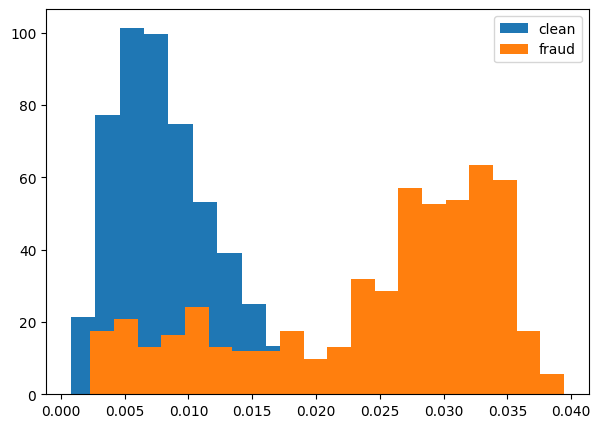

In [30]:
#visualising erros to find optimum thershold
fig,ax=plt.subplots(figsize=(7,5))
ax.hist(clean,bins=20,density=True,label='clean')
ax.hist(fraud,bins=20,density=True,label='fraud')
plt.legend()
plt.show()

# Finding thereshold

In [31]:
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix,recall_score,fbeta_score,precision_score,precision_recall_curve,roc_auc_score

In [32]:
#Finding optimum thershold
results=pd.DataFrame(columns=['thershold','precision','recall'])
for index,thereshold in enumerate([0.018,0.019,0.02,0.021,0.022,0.023,0.024,0.025,0.026,0.027,0.028]):
    y_pred=(erros>thereshold).astype(int)
    results.at[index,'precision']=precision_score(y_test,y_pred,pos_label=1)
    results.at[index,'recall']=recall_score(y_test,y_pred,pos_label=1)
    results.at[index,'thershold']=thereshold

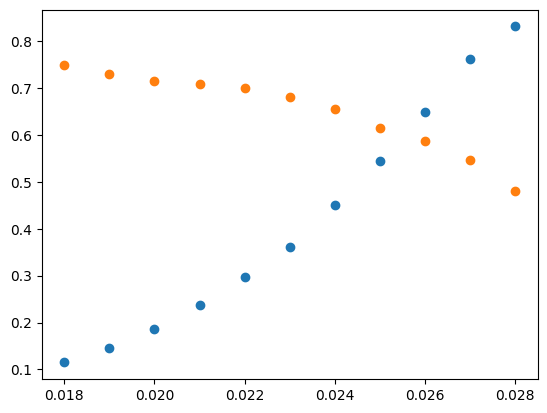

In [33]:
fig,ax=plt.subplots()
ax.scatter(results['thershold'],results['precision'])
ax.scatter(results['thershold'],results['recall'])
plt.show()

In [34]:
y_pred=(erros>0.025).astype(int)
print('Confusion matrix:')
print(confusion_matrix(y_test,y_pred))
print('Recall score :',recall_score(y_test,y_pred),'Precision_score:',precision_score(y_test,y_pred))


Confusion matrix:
[[84063   252]
 [  190   302]]
Recall score : 0.6138211382113821 Precision_score: 0.5451263537906137


In [35]:
#Having error thereshold between 0.019 to 0.023 , we can have
# 0.019 means more samples with less precision and more recall
# 0.023 means lesser samples

In [36]:
y_pred=(erros>0.019).astype(int)
print('Confusion matrix:')
print(confusion_matrix(y_test,y_pred))
print('Recall score :',recall_score(y_test,y_pred),'Precision_score:',precision_score(y_test,y_pred))


Confusion matrix:
[[82215  2100]
 [  133   359]]
Recall score : 0.7296747967479674 Precision_score: 0.14599430662871085
